In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # plot 3-d figures
import matplotlib.cm as cm

In [2]:
churn_df = pd.read_csv('subscribers_update.csv')
churn_df.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,churn,convert,Unnamed: 34
0,162502,21724479,economy,0,comedy,access to exclusive content,27.997724,2,NaN,False,...,14,True,1,2020/2/7 21:44,2020/6/7 21:44,NaN,True,0,1,1.0
1,380374,23383224,base,0,comedy,access to exclusive content,22.951579,2,70.0,False,...,14,True,1,2020/3/15 15:44,2020/7/15 15:44,NaN,True,0,1,NaN
2,496617,26844789,enhanced,3,regional,replace OTT,36.001186,2,25.0,True,...,14,False,0,NaN,NaN,NaN,True,1,0,NaN
3,356799,29417030,base,0,drama,replace OTT,20.051667,2,30.0,False,...,14,False,0,NaN,NaN,NaN,True,1,0,NaN
4,681701,26723159,base,4,comedy,replace OTT,22.951579,3,28.0,False,...,14,True,2,2020/2/19 12:57,2020/6/19 12:57,NaN,True,0,1,NaN


In [3]:
churn_df = churn_df.dropna(subset=['preferred_genre', 'age','male_TF','package_type','intended_use','weekly_consumption_hour','attribution_survey'])

In [4]:
churn_df['num_ideal_streaming_services'].fillna(churn_df['num_ideal_streaming_services'].mean(),inplace=True)

In [5]:
churn_df['num_weekly_services_utilized'].fillna(0,inplace=True)

In [6]:
churn_df.isnull().sum(axis=0)

Unnamed: 0                           0
subid                                0
package_type                         0
num_weekly_services_utilized         0
preferred_genre                      0
intended_use                         0
weekly_consumption_hour              0
num_ideal_streaming_services         0
age                                  0
male_TF                              0
country                              0
attribution_technical                0
attribution_survey                   0
op_sys                           12843
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
account_creation_date1               0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                             0
language                             0
payment_type                    133482
num_trial_days           

In [7]:
data = churn_df.drop(['Unnamed: 0','subid','country','account_creation_date','account_creation_date1','trial_end_date','initial_credit_card_declined','monthly_price','months_per_bill_period',
                          'language','payment_type','num_trial_days','current_sub_TF','last_payment','next_payment','cancel_date','convert',"Unnamed: 34"],axis=1)

In [8]:
data = pd.get_dummies(data,columns = ['package_type','preferred_genre','intended_use','male_TF','plan_type','attribution_technical','attribution_survey','op_sys'
                                           ,'plan_type','trial_completed'])

In [22]:
feature_x = [tag for tag in data.columns if tag not in ['churn','payment_period']]
print('feature:\n', feature_x)
X = data[feature_x].values
num_samples, num_features = X.shape
print('feature dim:', X.shape)
print('----------')
feature_y = ['churn']
print('target:\n', feature_y)
y = data[feature_y].values
y = y[:, 0]
print('target dim:', y.shape)

feature:
 ['num_weekly_services_utilized', 'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'discount_price', 'join_fee', 'package_type_base', 'package_type_economy', 'package_type_enhanced', 'package_type_unknown', 'preferred_genre_comedy', 'preferred_genre_drama', 'preferred_genre_international', 'preferred_genre_other', 'preferred_genre_regional', 'preferred_genre_unknown', 'intended_use_access to exclusive content', 'intended_use_education', 'intended_use_expand international access', 'intended_use_expand regional access', 'intended_use_other', 'intended_use_replace OTT', 'intended_use_supplement OTT', 'intended_use_unknown', 'male_TF_False', 'male_TF_True', 'plan_type_base_eur_14_day_trial', 'plan_type_base_uae_14_day_trial', 'plan_type_high_aud_14_day_trial', 'plan_type_high_sar_14_day_trial', 'plan_type_high_uae_14_day_trial', 'plan_type_low_gbp_14_day_trial', 'attribution_technical_affiliate', 'attribution_technical_appstore', 'attribution_technical_bing', 'att

In [23]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(X)  # apply min_max scale
X_recon = minmaxscaler.inverse_transform(X_scaled)  # apply the inverse of min_max scale

In [11]:
from sklearn.cluster import KMeans
inertias = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(X_scaled) 
    inertias[k] = kmeans.inertia_
print(inertias) 

{2: 769850.184836418, 3: 706023.4282105744, 4: 665449.6271549271, 5: 638156.0860514579, 6: 619213.6973846218, 7: 601835.1862213656, 8: 590724.2526103576, 9: 575912.9525680627, 10: 566098.8004074211, 11: 555770.3314525425, 12: 543872.0641353225, 13: 537415.9923086817, 14: 528884.2270398214, 15: 521668.2457300187, 16: 514661.55055590265, 17: 508076.7355688251, 18: 502435.6379172404, 19: 496703.43354258547}


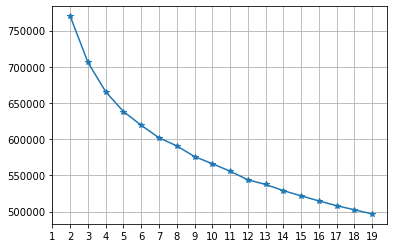

In [12]:
ax = plt.subplot()
ax.plot(list(inertias.keys()), list(inertias.values()), '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [32]:
SSE = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    SSE.append(kmeans.inertia_)

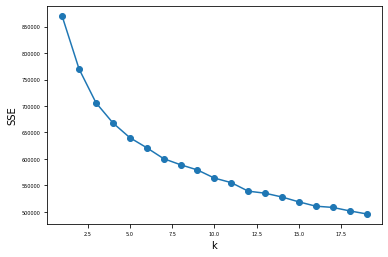

In [38]:
X = range(1,20)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.tick_params(labelsize=5)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.show()

In [25]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=2020)
y_pred = kmeans.fit_predict(X)

In [ ]:
churn_df.head()

In [ ]:
churn_df['cluster'] = y_pred
churn_df.to_csv('customers.csv')

In [20]:
def visualize_cluster_result(x, dim1, dim2, y_pred, k):
    # select two feature dims: dim1, dim2, visualize the clusters
    assert dim1 in range(x.shape[1])
    assert dim2 in range(x.shape[1])
    ax = plt.subplot()
    # use a for loop to plot each cluster (with different colors)
    for i in range(k):
        ax.scatter(x[y_pred == i, dim1], x[y_pred ==  i, dim2], label='cluster: %d' % i)
    plt.title('Visualization of clustering of dim %d and dim %d' % (dim1, dim2))
    ax.set_xlabel('dim: %d' % dim1)
    ax.set_ylabel('dim: %d' % dim2)
    ax.legend()
    plt.show()

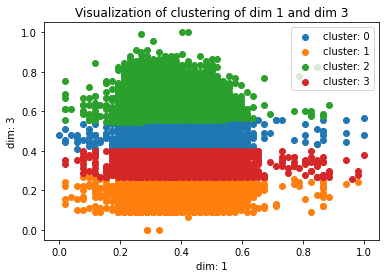

In [26]:
visualize_cluster_result(X_scaled, 1, 3, y_pred, k)